## 範例重點

知道如何在 keras 中加入 dropout

了解 dropout 中 ratio 的意義與對訓練的影響

In [1]:
import os
import keras

# GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25

In [7]:
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]


W0721 22:56:11.913766 4623267264 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 22:56:12.065353 4623267264 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 22:56:12.153665 4623267264 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 22:56:12.210618 4623267264 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 14s 272us/step - loss: 1.2928 - acc: 0.5382 - val_loss: 1.3115 - val_acc: 0.5306
Epoch 50/50
50000/50000 [==============================] - 36s 725us/step - loss: 1.2896 - acc: 0.5388 - val_loss: 1.3153 - val_acc: 0.5275


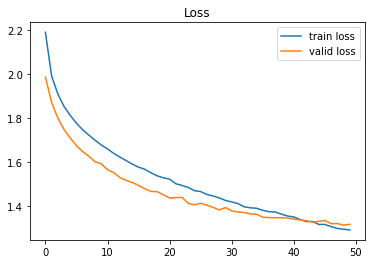

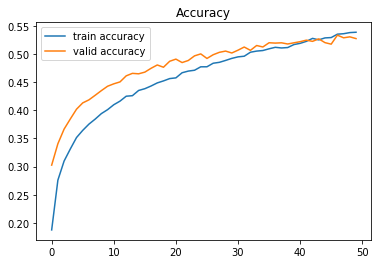

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work

1.請比較使用不同層數以及不同 Dropout rate 對訓練的效果

2.將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [9]:
import os
import keras

# GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_59 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_60 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_61 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 9s 189us/step - loss: 2.3027 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.3027 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 8s 165us/step - loss: 2.3027 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 9s 170us/step - loss: 2.3027 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.3027 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 8s 165us/step - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 3072)     

50000/50000 [==============================] - 10s 192us/step - loss: 2.0651 - acc: 0.2035 - val_loss: 2.1916 - val_acc: 0.1561
Epoch 40/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.0615 - acc: 0.2039 - val_loss: 2.1665 - val_acc: 0.1729
Epoch 41/50
50000/50000 [==============================] - 15s 292us/step - loss: 2.0616 - acc: 0.2031 - val_loss: 2.1617 - val_acc: 0.1755
Epoch 42/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.0630 - acc: 0.2069 - val_loss: 2.1748 - val_acc: 0.1598
Epoch 43/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.0605 - acc: 0.2045 - val_loss: 2.1666 - val_acc: 0.1766
Epoch 44/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.0591 - acc: 0.2029 - val_loss: 2.1748 - val_acc: 0.1719
Epoch 45/50
50000/50000 [==============================] - 9s 188us/step - loss: 2.0587 - acc: 0.2026 - val_loss: 2.1109 - val_acc: 0.2010
Epoch 46/50
50000/50000 [============

50000/50000 [==============================] - 11s 216us/step - loss: 1.9840 - acc: 0.2380 - val_loss: 2.0540 - val_acc: 0.2348
Epoch 34/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.9902 - acc: 0.2380 - val_loss: 2.0267 - val_acc: 0.2355
Epoch 35/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.9852 - acc: 0.2403 - val_loss: 2.0692 - val_acc: 0.2167
Epoch 36/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.9755 - acc: 0.2434 - val_loss: 2.0378 - val_acc: 0.2344
Epoch 37/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.9787 - acc: 0.2450 - val_loss: 2.0200 - val_acc: 0.2207
Epoch 38/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.9814 - acc: 0.2426 - val_loss: 2.0610 - val_acc: 0.2258
Epoch 39/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.9775 - acc: 0.2440 - val_loss: 2.0373 - val_acc: 0.2255
Epoch 40/50
50000/50000 [=======

50000/50000 [==============================] - 19s 376us/step - loss: 1.6415 - acc: 0.4092 - val_loss: 1.5907 - val_acc: 0.4431
Epoch 28/50
50000/50000 [==============================] - 20s 400us/step - loss: 1.6357 - acc: 0.4105 - val_loss: 1.5571 - val_acc: 0.4477
Epoch 29/50
50000/50000 [==============================] - 22s 431us/step - loss: 1.6365 - acc: 0.4127 - val_loss: 1.5726 - val_acc: 0.4414
Epoch 30/50
50000/50000 [==============================] - 18s 369us/step - loss: 1.6344 - acc: 0.4121 - val_loss: 1.5659 - val_acc: 0.4449
Epoch 31/50
50000/50000 [==============================] - 30s 594us/step - loss: 1.6289 - acc: 0.4107 - val_loss: 1.5712 - val_acc: 0.4527
Epoch 32/50
50000/50000 [==============================] - 32s 649us/step - loss: 1.6345 - acc: 0.4132 - val_loss: 1.5578 - val_acc: 0.4456
Epoch 33/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.6222 - acc: 0.4152 - val_loss: 1.5711 - val_acc: 0.4535
Epoch 34/50
50000/50000 [=======

50000/50000 [==============================] - 11s 212us/step - loss: 1.4037 - acc: 0.4965 - val_loss: 1.4215 - val_acc: 0.4913
Epoch 22/50
50000/50000 [==============================] - 15s 300us/step - loss: 1.3858 - acc: 0.5024 - val_loss: 1.4077 - val_acc: 0.5009
Epoch 23/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.3755 - acc: 0.5055 - val_loss: 1.3995 - val_acc: 0.5042
Epoch 24/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.3733 - acc: 0.5076 - val_loss: 1.4046 - val_acc: 0.5006
Epoch 25/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.3647 - acc: 0.5102 - val_loss: 1.4014 - val_acc: 0.5024
Epoch 26/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.3504 - acc: 0.5167 - val_loss: 1.4056 - val_acc: 0.5019
Epoch 27/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.3400 - acc: 0.5183 - val_loss: 1.3673 - val_acc: 0.5142
Epoch 28/50
50000/50000 [=======

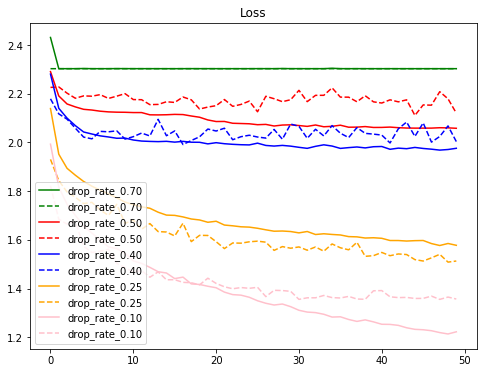

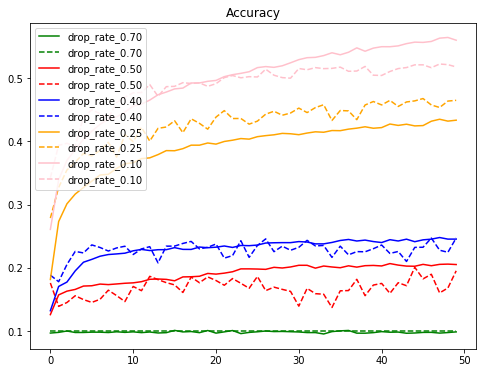

In [19]:
train, test = keras.datasets.cifar10.load_data()




## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    




x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)




from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model




## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
# MOMENTUM = 0.95
Dropout_EXP = [0.7, 0.5, 0.4, 0.25, 0.1]



# Define results
results = {}
for dropout in Dropout_EXP :
    #       build_mlp(input_shape, output_units=10, num_neurons, drp_ratio=0.2)
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout)

    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag_of_dropout = 'drop_rate_%.2f' % dropout
    results[name_tag_of_dropout] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}






# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.plot(range(len(train_loss)), train_loss, label="train loss")
# plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
# plt.legend()
# plt.title("Loss")
# plt.show()

# plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
# plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
# plt.legend()
# plt.title("Accuracy")
# plt.show()



import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["g", "r", "b", "orange", "pink"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()


## 參考資料


CSDN - 對 Dropout 的詮釋

1. 組合派 (Ensemble)

        overfitting → 參數量過多 → 找到一個比較瘦的網路可能可以降低 overfitting 的程度 → 
        
        手動或使用 Grid-Search? 太慢 → 使用 Dropout 使學習時隨機打斷一些連結 → 可以解決費時的問題，把重要的連結權重增加；
        
        不重要的減輕 → 重新組合起來後 (Inference phase) 自然會是一個以權重定義後的瘦網路。



2. 動機論 (有豬隊友)

        overfitting →  有人 (參數/連結) 濫竽充數 → 隨機將某些人 (神經元) 分成數組 → 各組學會懂得自立自強 

        → 重新組合後 (Inference phase) 會比原本更強大。

![img1](https://raw.githubusercontent.com/stdcoutzyx/Blogs/master/blogs/imgs/n7-1.png)



--

## 參考連結：

## [理解 Dropout – CSDN](https://blog.csdn.net/stdcoutzyx/article/details/49022443)



### <font color="red">dropout是指在深度學習網絡的訓練過程中，對於神經網絡單元，按照一定的概率將其暫時從網絡中丟棄。注意是暫時，對於隨機梯度下降來說，由於是隨機丟棄，故而每一個mini-batch都在訓練不同的網絡。</font>



該論文從神經網絡的難題出發，一步一步引出dropout為何有效的解釋。大規模的神經網絡有兩個缺點：

1.<font color="orange">費時</font>

2.<font color="green">容易過擬合</font>

這兩個缺點真是抱在深度學習大腿上的兩個大包袱，一左一右，相得益彰，額不，臭氣相投。過擬合是很多機器學習的通病，過擬合了，得到的模型基本就廢了。而<font color="green">為了解決過擬合問題，一般會採用ensemble方法，即訓練多個模型做組合，</font>
<font color="orange">此時，費時就成為一個大問題，不僅訓練起來費時，測試起來多個模型也很費時。總之，幾乎形成了一個死鎖。</font>

> Dropout的出現很好的可以解決這個問題，<font color="orange">每次做完dropout，相當於從原始的網絡中找到一個更瘦的網絡</font>，如下圖所示：
> ![img1](https://raw.githubusercontent.com/stdcoutzyx/Blogs/master/blogs/imgs/n7-1.png)
> ### <font color="orange">對於一個有N個節點的神經網絡，有了dropout後，就可以看做是 $2^n$ 個模型的集合了，但此時要訓練的參數數目卻是不變的，這就解脫了費時的問題。</font>

> 那麼，類比過來，有性繁殖的方式不僅僅可以將優秀的基因傳下來，還可以降低基因之間的聯合適應性，使得複雜的大段大段基因聯合適應性變成比較小的一個一個小段基因的聯合適應性。
> ### <font color="red">Dropout 它強迫一個神經單元，和隨機挑選出來的其他神經單元共同工作，達到好的效果。消除減弱了神經元節點間的聯合適應性，增強了泛化能力。</font>




論文中的其他技術點

1. <font color="green">防止過擬合的方法：</font>

 - <font color="green">提前終止（當驗證集上的效果變差的時候）</font>

 - <font color="green">L1和L2正則化加權</font>

 - <font color="green">soft weight sharing</font>

 - <font color="green">dropout</font>



2. dropout率的選擇

 - <font color="orange">經過交叉驗證，隱含節點 dropout率 等於 0.5 的時候效果最好，原因是 0.5 的時候 dropout 隨機生成的網絡結構最多。</font>
 
 - dropout也可以被用作一種添加噪聲的方法，直接對input進行操作。輸入層設為更接近1的數。使得輸入變化不會太大（0.8）


3. 訓練過程

 - 對參數w的訓練進行球形限制(max-normalization)，對dropout的訓練非常有用。
 
 - 球形半徑c是一個需要調整的參數。可以使用驗證集進行參數調優
 
 - dropout自己雖然也很厲害，但是 <font color="red">dropout、max-normalization、large decaying learning rates and high momentum 組合起來效果更好，比如 max-norm regularization 就可以防止大的 learning rate 導致的參數 blow up。</font>
 
 - 使用 pretraining 方法也可以幫助 dropout 訓練參數，在使用 dropout 時，要將所有參數都乘以 $ 1 / p $。


4. 部分實驗結論

該論文的實驗部分很豐富，有大量的評測數據。

- maxout 神經網絡中得另一種方法，Cifar-10上超越dropout

- 文本分類上，dropout效果提升有限，分析原因可能是Reuters-RCV1數據量足夠大，過擬合併不是模型的主要問題

- dropout與其他standerd regularizers的對比 

    - L2 weight decay
    - lasso
    - KL-sparsity
    - max-norm regularization
    - dropout



5. 特徵學習 

 - <font color="red">標準神經網絡，節點之間的相關性使得他們可以合作去 fix 其他節點中得噪聲，但這些合作並不能在 unseen data 上泛化，於是，過擬合， dropout 破壞了這種相關性。在 autoencoder 上，有 dropout 的算法更能學習有意義的特徵（不過只能從直觀上，不能量化）。</font>

 - <font color="red">產生的向量具有稀疏性。</font>

 - 保持隱含節點數目不變， dropout率 變化 ； 保持激活的隱節點數目不變，隱節點數目變化。



6. 數據量小的時候，dropout 效果不好，數據量大了，dropout 效果好


7. 模型均值預測

    - 使用weight-scaling來做預測的均值化

    - 使用mente-carlo方法來做預測。即對每個樣本根據dropout率先sample出來k個net，然後做預測，k越大，效果越好。


8. Multiplicative Gaussian Noise 

    - 使用高斯分佈的dropout而不是伯努利模型dropout


9. <font color="red">dropout的缺點就在於訓練時間是沒有dropout網絡的2-3倍。</font>
















--

## [Dropout in Deep Learning](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)




